In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_parquet('survey_results_public.parquet')

In [3]:
# create a dictionary of country name abbreviations
abbreviations = {
    'United States of America' : 'USA',
    'United Kingdom of Great Britain and Northern Ireland' : 'UK',
    'Iran, Islamic Republic of...' : 'Iran',
    'Russian Federation' : 'Russian',
    'Venezuela, Bolivarian Republic of...' : 'Venezuela',
}

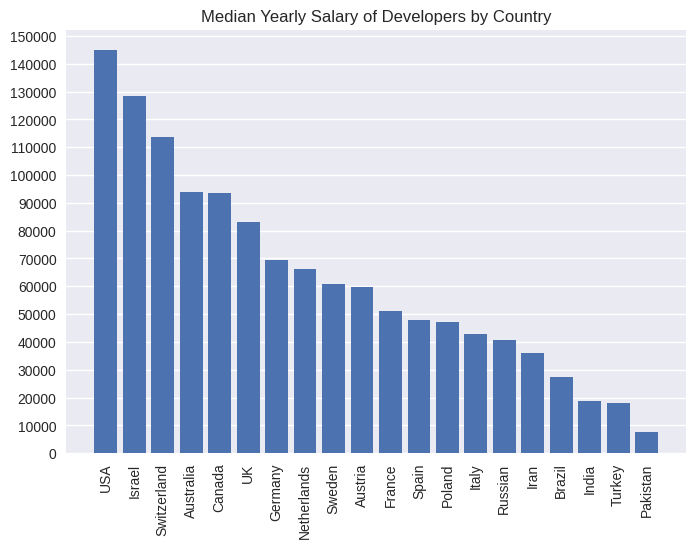

In [4]:
# get the top 20 countries by count of respondents
ctrys = df.Country.value_counts().head(20)

# group the data by country
c_grp = df.groupby(['Country'])

# function to get the median yearly salary of developers for a given country
def x(c_grp, name):
    return c_grp.get_group(name).ConvertedCompYearly.dropna().median()

# create a list of median yearly salaries for the top 20 countries
m_ys = [x(c_grp, name) for name in ctrys.index.to_list()]

# create a dictionary mapping each country to its median yearly salary
m_ys_c = dict(zip(ctrys.index.to_list(), m_ys))

# create a Pandas Series from the dictionary and sort it in descending order
m_ys_c = pd.Series(m_ys_c)
m_ys_c = m_ys_c.sort_values(ascending=False)

# replace the country names in the index of the Pandas Series with their abbreviations
m_ys_c.index = m_ys_c.index.to_series().replace(abbreviations)

# create a bar plot of the median yearly salary by country
plt.bar(m_ys_c.index, m_ys_c)
plt.title('Median Yearly Salary of Developers by Country')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,150001,10000))
plt.grid(axis='x')

plt.savefig('Median Yearly Salary of Developers by Country.jpg', bbox_inches='tight')
plt.show()

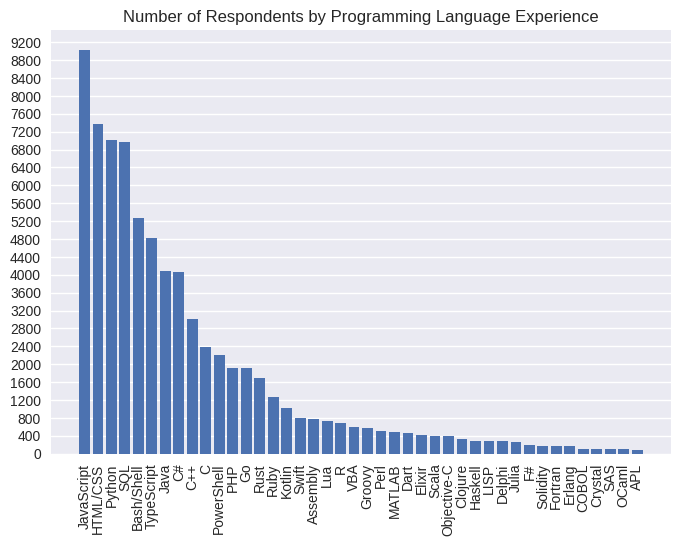

In [5]:
# Get the Series of languages that respondents from USA have worked with
US_ln = c_grp.get_group('United States of America').LanguageHaveWorkedWith.dropna()

# Concatenate the strings in the series with ';' delimiter
# and split them into a list of languages
US_ln = US_ln.str.cat(sep=';').split(';')

# Create a Series of the number of respondents who have experience with each programming language
US_ln = pd.Series(US_ln).value_counts()

plt.bar(US_ln.keys(), US_ln)
plt.title('Number of Respondents by Programming Language Experience')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,9201,400))
plt.grid(axis='x')

plt.savefig('Number of Respondents by Programming Language Experience.jpg', bbox_inches='tight')
plt.show()

In [6]:
# Get a series of all programming languages
# that respondents have worked with by country
ln_by_ctry = c_grp.LanguageHaveWorkedWith

# Count the number of respondents by country
resp_sum = ln_by_ctry.apply(lambda x: len(x.dropna()))
resp_sum = resp_sum.sort_values(ascending=False)

# respondents who have worked with Python by country
py_resp  = ln_by_ctry.apply(lambda x: x.str.contains('Python').sum())
py_resp  = py_resp.sort_values(ascending=False)

# Respondents who have worked with JavaScript by country
js_resp  = ln_by_ctry.apply(lambda x: x.str.contains('JavaScript').sum())
js_resp  = js_resp.sort_values(ascending=False)

# Respondents who have worked with SQL by country
sql_resp = ln_by_ctry.apply(lambda x: x.str.contains('SQL').sum())
sql_resp = sql_resp.sort_values(ascending=False)

# Dataframe with the above information
result = pd.DataFrame({
    'resp_sum' : resp_sum,
    'py_resp' : py_resp,
    'py_pct' : (py_resp / resp_sum) * 100,
    'js_resp' : js_resp,
    'js_pct' : (js_resp / resp_sum) * 100,
    'sql_resp' : sql_resp,
    'sql_pct' : (sql_resp / resp_sum) * 100,
})

# Clear small respondents countries
result = result[result.resp_sum > 100]

# replace the country names in the index of the Pandas Series with their abbreviations
result.index = result.index.to_series().replace(abbreviations)

# Sort the dataframe by the number of respondents in descending order
result = result.sort_values(by='resp_sum', ascending=False)

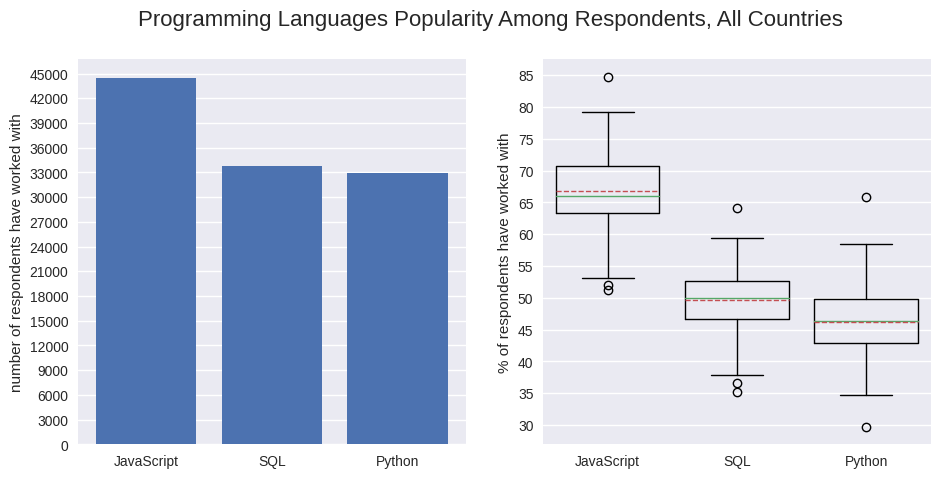

In [7]:
# Create the subplots for the figure
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Programming Languages Popularity Among Respondents, All Countries', fontsize=16)

# Define the programming languages to be plotted
langs = ['JavaScript', 'SQL', 'Python']

# Add a grid to the x-axis of both subplots
ax[0].grid(axis='x')
ax[1].grid(axis='x')

# Define the heights of the bars in the first subplot
height = [
    result.js_resp.sum(),
    result.sql_resp.sum(),
    result.py_resp.sum(),
]

# Create a bar plot of the heights in the first subplot
ax[0].bar(langs, height)

# Set the y-ticks for the first subplot
ax[0].set_yticks(np.arange(0, 46000, 3000))

# Set the y-label for the first subplot
ax[0].set_ylabel('number of respondents have worked with')

# Define the data for the boxes in the second subplot
boxes = [
    result.js_pct.to_list(),
    result.sql_pct.to_list(),
    result.py_pct.to_list(),
]

# Create a box plot of the data in the second subplot
ax[1].boxplot(
    boxes, labels = langs, widths = .8,
    meanline = True, showmeans = True)

# Set the y-ticks for the second subplot
ax[1].set_yticks(np.arange(30,86,5))

# Set the y-label for the second subplot
ax[1].set_ylabel('% of respondents have worked with')

# Set the x-limits for the second subplot
ax[1].set_xlim(.5, 3.5)

# Display the plot
plt.show()

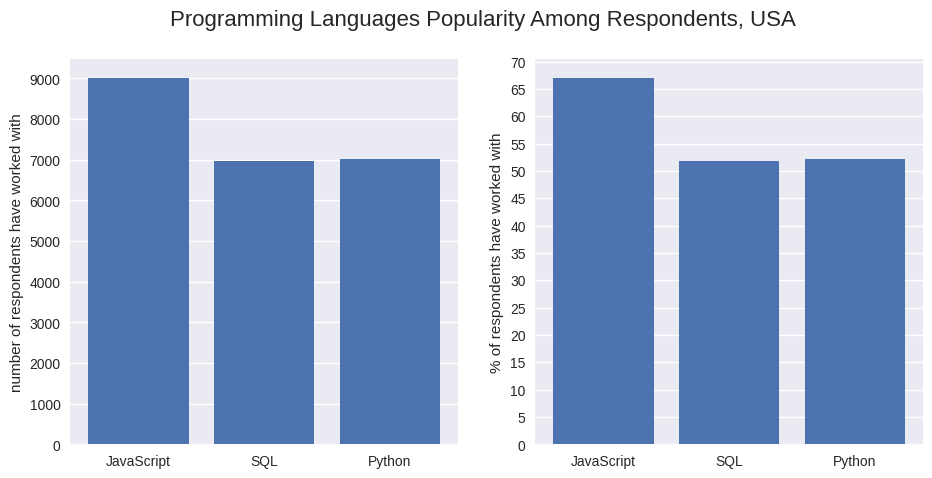

In [8]:
# Create the subplots for the figure
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Programming Languages Popularity Among Respondents, USA', fontsize=16)

# Define the programming languages to be plotted
langs = ['JavaScript', 'SQL', 'Python']

# Add a grid to the x-axis of both subplots
ax[0].grid(axis='x')
ax[1].grid(axis='x')

# Define the heights of the bars in the first subplot
height = [
    result.loc['USA', 'js_resp'],
    result.loc['USA', 'sql_resp'],
    result.loc['USA', 'py_resp'],
]

# Create a bar plot of the heights in the first subplot
ax[0].bar(langs, height)

# Set the y-ticks for the first subplot
ax[0].set_yticks(np.arange(0, 9001, 1000))

# Set the y-label for the first subplot
ax[0].set_ylabel('number of respondents have worked with')

# Define the heights of the bars in the second subplot
height = [
    result.loc['USA', 'js_pct'],
    result.loc['USA', 'sql_pct'],
    result.loc['USA', 'py_pct'],
]

# Create a bar plot of the heights in the second subplot
ax[1].bar(langs, height)

# Set the y-ticks for the second subplot
ax[1].set_yticks(np.arange(0,71,5))

# Set the y-label for the second subplot
ax[1].set_ylabel('% of respondents have worked with')

# Display the plot
plt.show()